In [3]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import datasets
from keras.utils import np_utils

In [4]:
#이 데이터는 아예 나눠져서 들어와있음
(X_train, Y_train), (X_test, Y_test) = datasets.mnist.load_data()
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

11501568/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


4
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0  47 241 230  20   0   0   0]
 [  0   0   0   0   0   0   0   0   0  95  81  20   0   0   0   0   0   0
    0   0   0 195 253 145  20   0   0   0]
 [  0   0   0   0   0   0   0   0   6 162 253 124   0   0   0 

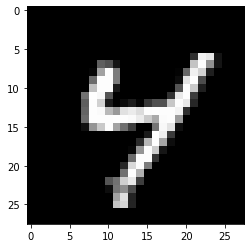

In [11]:
my_sample = np.random.randint(60000)
plt.imshow(X_train[my_sample], cmap='gray') #이 데이터는 이미지라서
plt.show
print(Y_train[my_sample]) #정답을 확인해보자
print(X_train[my_sample]) 

#데이터를 보면 곱하면 커짐, 그러면 scale을 해줘야함, 0-1사이면 곱해도 커지지 않음.

In [13]:
y_train = np_utils.to_categorical(Y_train)  #onehotencoding을 해줌
y_test = np_utils.to_categorical(Y_test)
print(Y_train[5000])
print(y_train[5000])

7
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [16]:
x_train = X_train.reshape(-1, 28*28)
x_test = X_test.reshape(-1, 28*28)
x_train = x_train/255  #minmax scale   255니까 0-1로 만들어줌
x_test = x_test/255
print(x_train.shape)  #784개의 픽셀이 들어있는 데이터프레임 6만개

(60000, 784)


In [18]:
model = Sequential()
model.add(Dense(128, input_dim=28*28,
                activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))  #카테고리가 10개


In [19]:
model.compile(optimizer='adam', loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               100480    
                                                                 
 dense_4 (Dense)             (None, 128)               16512     
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [20]:
#학습시키기
fit_hist = model.fit(x_train, y_train, batch_size=128,
                     epochs=15, validation_split=0.2, verbose=1)

Epoch 1/15
375/375 [==============================] - 3s 6ms/step - loss: 0.3487 - accuracy: 0.9007 - val_loss: 0.1656 - val_accuracy: 0.9514
Epoch 2/15
375/375 [==============================] - 2s 5ms/step - loss: 0.1373 - accuracy: 0.9593 - val_loss: 0.1193 - val_accuracy: 0.9658
Epoch 3/15
375/375 [==============================] - 2s 6ms/step - loss: 0.0966 - accuracy: 0.9714 - val_loss: 0.1068 - val_accuracy: 0.9665
Epoch 4/15
375/375 [==============================] - 2s 6ms/step - loss: 0.0736 - accuracy: 0.9776 - val_loss: 0.0985 - val_accuracy: 0.9707
Epoch 5/15
375/375 [==============================] - 2s 6ms/step - loss: 0.0554 - accuracy: 0.9829 - val_loss: 0.0959 - val_accuracy: 0.9711
Epoch 6/15
375/375 [==============================] - 2s 6ms/step - loss: 0.0437 - accuracy: 0.9869 - val_loss: 0.0956 - val_accuracy: 0.9722
Epoch 7/15
375/375 [==============================] - 2s 6ms/step - loss: 0.0339 - accuracy: 0.9897 - val_loss: 0.0880 - val_accuracy: 0.9753
Epoch 

In [21]:
#검증하기
score = model.evaluate(x_test, y_test, verbose=0)
print('Final test set accuracy :', score[1])

Final test set accuracy : 0.9758999943733215


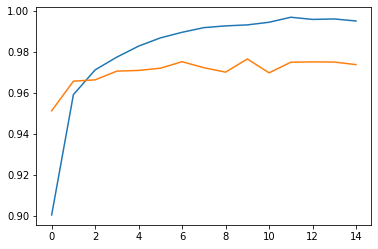

In [22]:
plt.plot(fit_hist.history['accuracy'])
plt.plot(fit_hist.history['val_accuracy'])
plt.show()


0
[[1.0000000e+00 3.4500859e-12 1.5862339e-08 5.5530615e-12 5.7627771e-14
  1.3624906e-12 2.3312761e-09 1.1727662e-10 7.1949142e-13 2.4004556e-14]]
0


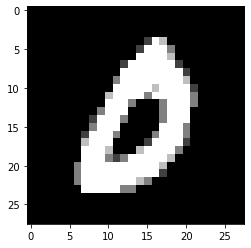

In [27]:
my_sample = np.random.randint(10000) #테스트 안한곳에서 랜덤하게
plt.imshow(X_test[my_sample], cmap='gray')
print(Y_test[my_sample])
pred = model.predict(x_test[my_sample].reshape(-1, 28*28))
print(pred)
print(np.argmax(pred))
